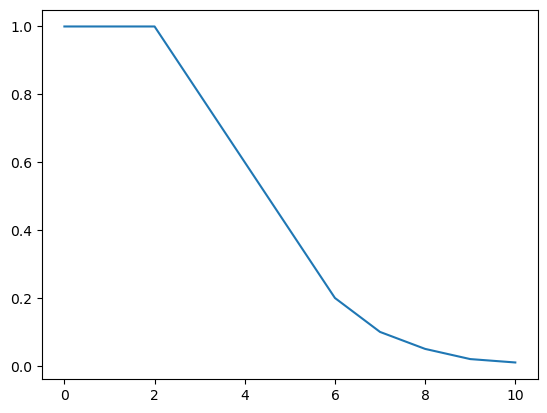

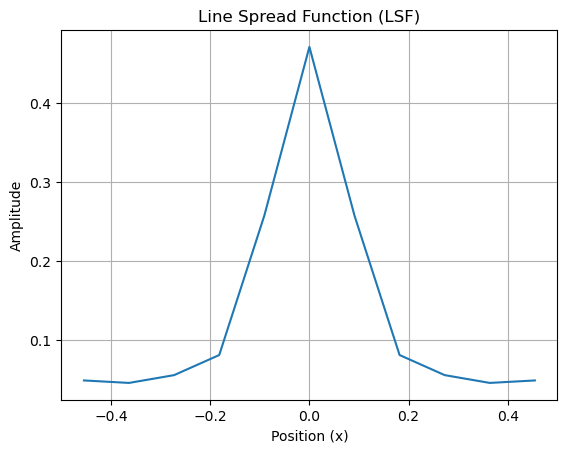

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example SFR data (this should be your actual SFR data)
sfr = np.array([1.0, 1.0, 1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.02, 0.01])
spatial_frequencies = np.linspace(0, 1, len(sfr))  # Spatial frequencies corresponding to SFR

# Perform the inverse Fourier transform
lsf = np.fft.ifft(sfr)

plt.figure(0)
plt.plot(sfr)


# Plot the LSF
plt.figure(1)
plt.plot(np.fft.fftshift(np.fft.fftfreq(len(lsf))), np.fft.fftshift(np.abs(lsf)))
plt.title('Line Spread Function (LSF)')
plt.xlabel('Position (x)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


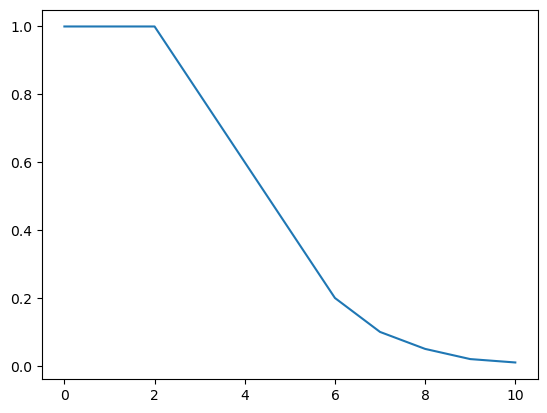

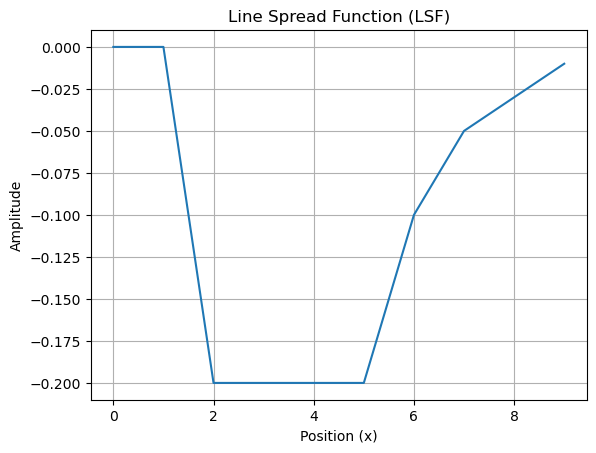

In [2]:
# Example SFR data (this should be your actual SFR data)
sfr = np.array([1.0, 1.0, 1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.02, 0.01])
spatial_frequencies = np.linspace(0, 1, len(sfr))  # Spatial frequencies corresponding to SFR

# Perform the inverse Fourier transform
lsf = np.diff(sfr)

plt.figure(0)
plt.plot(sfr)


# Plot the LSF
plt.figure(1)
plt.plot(lsf)
plt.title('Line Spread Function (LSF)')
plt.xlabel('Position (x)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [5]:
import scipy.fftpack

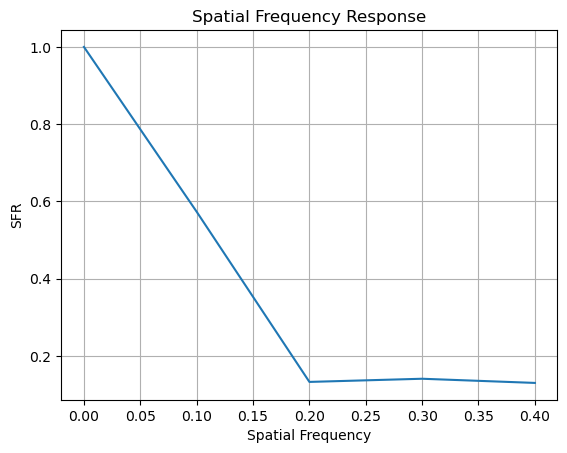

In [6]:
mtf = np.abs(scipy.fftpack.fft(lsf))
frequencies = scipy.fftpack.fftfreq(len(lsf))

# Step 5: Normalize the MTF to obtain the SFR
sfr = mtf / mtf[0]

# Plot the SFR
plt.plot(frequencies[:len(frequencies)//2], sfr[:len(sfr)//2])
plt.xlabel('Spatial Frequency')
plt.ylabel('SFR')
plt.title('Spatial Frequency Response')
plt.grid()
plt.show()

### from chatGPT 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.fftpack import fft, fftshift

# Sample ESF (replace with actual data)
x = np.linspace(-5, 5, 100)
esf = 0.5 * (1 + np.erf(x / np.sqrt(2)))

# Smooth the ESF
esf_smooth = gaussian_filter1d(esf, sigma=1)

# Calculate the LSF by differentiating the ESF
lsf = np.diff(esf_smooth)

# Calculate the MTF by taking the Fourier transform of the LSF
mtf = np.abs(fftshift(fft(lsf)))

# Normalize MTF
mtf /= np.max(mtf)

# Plot the ESF, LSF, and MTF
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

ax[0].plot(x, esf, label='ESF')
ax[0].plot(x, esf_smooth, label='Smoothed ESF')
ax[0].set_title('Edge Spread Function (ESF)')
ax[0].legend()

ax[1].plot(x[:-1], lsf, label='LSF')
ax[1].set_title('Line Spread Function (LSF)')
ax[1].legend()

ax[2].plot(np.linspace(-0.5, 0.5, len(mtf)), mtf, label='MTF')
ax[2].set_title('Modulation Transfer Function (MTF)')
ax[2].legend()

plt.tight_layout()
plt.show()

AttributeError: module 'numpy' has no attribute 'erf'